In [1]:
from finstmt import IncomeStatements,BalanceSheets,FinancialStatements
import pandas as pd

bs_df=pd.read_excel('WMT Balance Sheet.xlsx',index_col=0)
inc_df=pd.read_excel('WMT Income Statement.xlsx',index_col=0)

bs_data=BalanceSheets.from_df(bs_df)
inc_data=IncomeStatements.from_df(inc_df)
stmts=FinancialStatements(inc_data,bs_data)

INFO: Was not able to extract data from the following names: {'Net Debt', 'Investments', 'Other Assets', 'Other Liabilities'}
INFO: Was not able to extract data from the following names: {'EPS Diluted', 'Net Income Com', 'Dividend per Share', 'EBIT Margin', 'Profit Margin', 'Preferred Dividends', 'Net Profit Margin', 'Shares (basic)', 'EBITDA Margin', 'Shares (weighted, diluted)', 'Free Cash Flow margin', 'EBITDA', 'Consolidated Income', 'Net Income - Non-Controlling int', 'Gross Margin', 'Net Income - Discontinued ops', 'Gross Profit', 'Shares (weighted)', 'Earnings Before Tax Margin', 'EPS', 'Revenue Growth'}


C:\Users\nafissaad\AppData\Local\Programs\Python\Python37\lib\site-packages\finstmt\findata\database.py:78: UserWarning: Previously had ebit extracted from "Operating Income". Replacing with value from "EBIT"
  warnings.warn(f'Previously had {item_config.key} '


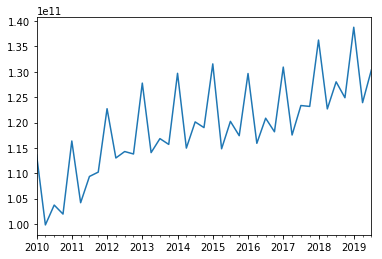

In [2]:
#Simple or Complex Time_Series
%matplotlib inline
stmts.revenue.plot.line()

In [3]:
stmts.revenue.head(10)

2010-01-31    1.136220e+11
2010-04-30    9.981100e+10
2010-07-31    1.037260e+11
2010-10-31    1.019520e+11
2011-01-31    1.163600e+11
2011-04-30    1.041890e+11
2011-07-31    1.093660e+11
2011-10-31    1.102260e+11
2012-01-31    1.227280e+11
2012-04-30    1.130100e+11
dtype: float64

In [4]:
rev_df=pd.DataFrame(stmts.revenue)
rev_df.columns=['Revenue']
rev_df.head()

,Revenue
2010-01-31,1.136220e+11
2010-04-30,9.981100e+10
2010-07-31,1.037260e+11
2010-10-31,1.019520e+11
2011-01-31,1.163600e+11


In [5]:
rev_df['t']=range(len(rev_df))
rev_df.head()

,Revenue,t
2010-01-31,1.136220e+11,0
2010-04-30,9.981100e+10,1
2010-07-31,1.037260e+11,2
2010-10-31,1.019520e+11,3
2011-01-31,1.163600e+11,4


In [6]:
rev_df.tail()

,Revenue,t
2018-07-31,1.280280e+11,34
2018-10-31,1.248940e+11,35
2019-01-31,1.387930e+11,36
2019-04-30,1.239250e+11,37
2019-07-31,1.303770e+11,38


In [7]:
rev_df['Month']=[date.month for date in rev_df.index]
rev_df.head()

,Revenue,t,Month
2010-01-31,1.136220e+11,0,1
2010-04-30,9.981100e+10,1,4
2010-07-31,1.037260e+11,2,7
2010-10-31,1.019520e+11,3,10
2011-01-31,1.163600e+11,4,1


In [8]:
reg_df=pd.get_dummies(rev_df,columns=['Month'])
reg_df.head(10)

,Revenue,t,Month_1,Month_4,Month_7,Month_10
2010-01-31,1.136220e+11,0,1,0,0,0
2010-04-30,9.981100e+10,1,0,1,0,0
2010-07-31,1.037260e+11,2,0,0,1,0
2010-10-31,1.019520e+11,3,0,0,0,1
2011-01-31,1.163600e+11,4,1,0,0,0
2011-04-30,1.041890e+11,5,0,1,0,0
2011-07-31,1.093660e+11,6,0,0,1,0
2011-10-31,1.102260e+11,7,0,0,0,1
2012-01-31,1.227280e+11,8,1,0,0,0
2012-04-30,1.130100e+11,9,0,1,0,0


In [9]:
def df_monthly_dummmies_from_by_date_series(series,column_name):
    '''
    Take a series which has dates as the index, and creates a DataFrame with dummy variables from month of those dates
    '''
    df=pd.DataFrame(series)
    df.columns=[column_name]
    df['t']=range(len(rev_df))
    df['Month']=[date.month for date in df.index]
    reg_df=pd.get_dummies(df,columns=['Month'])
    return reg_df
df_monthly_dummmies_from_by_date_series(stmts.cash,'Cash').head()

,Cash,t,Month_1,Month_4,Month_7,Month_10
2010-01-31,7.907000e+09,0,1,0,0,0
2010-04-30,8.516000e+09,1,0,1,0,0
2010-07-31,1.019500e+10,2,0,0,1,0
2010-10-31,1.061600e+10,3,0,0,0,1
2011-01-31,7.395000e+09,4,1,0,0,0


In [10]:
month_col=[col for col in reg_df.columns if 'Month' in col]
month_col

['Month_1', 'Month_4', 'Month_7', 'Month_10']

In [11]:
x_cols=['t']+month_col
x_cols

['t', 'Month_1', 'Month_4', 'Month_7', 'Month_10']

In [12]:
import statsmodels.api as sm
model=sm.OLS(reg_df['Revenue'],sm.add_constant(reg_df[x_cols]),hasconst=True)
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Revenue   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     115.4
Date:                Sat, 21 Jan 2023   Prob (F-statistic):           2.79e-19
Time:                        14:52:33   Log-Likelihood:                -896.78
No. Observations:                  39   AIC:                             1804.
Df Residuals:                      34   BIC:                             1812.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.605e+10   6.32e+08    136.083      0.000    8.48e+10    8.73e+10
t           6.095e+08   3.58e+07     17.022      0.000    5.37e+08    6.82e+08
Month_1     3.072e+10   7.02e+08     43.785      0.000    2.93e+10    3.21e+10
Month_4     1.646e+10   7.08e+08     23.262      0.000     1.5e+10    1.79e+10
Month_7     2.047e+10   7.15e+08     28.623      0.000     1.9e+10    2.19e+10
Month_10     1.84e+10   7.37e+08     24.981      0.000    1.69e+10    1.99e+10
==============================================================================
Omnibus:                        2.366   Durbin-Watson:                   0.338
Prob(Omnibus):                  0.306   Jarque-Bera (JB):                1.341
Skew:                           0.090   Prob(JB):                        0.512
Kurtosis:                       2.110   Cond. No.                     9.48e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.12e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [13]:
last_t=reg_df['t'].max()
t=last_t + 1
t

39

In [14]:
last_q=reg_df.index.max()
last_q

Timestamp('2019-07-31 00:00:00')

In [15]:
fcst=results.params['const']+results.params['t']*t + results.params['Month_10']
fcst

128225479674.79669

In [16]:
fcst_dates=pd.date_range(start=last_q,freq='3M',periods=12)
fcst_dates

DatetimeIndex(['2019-07-31', '2019-10-31', '2020-01-31', '2020-04-30',
               '2020-07-31', '2020-10-31', '2021-01-31', '2021-04-30',
               '2021-07-31', '2021-10-31', '2022-01-31', '2022-04-30'],
              dtype='datetime64[ns]', freq='3M')

In [17]:
for i, date in enumerate(fcst_dates):
    print(i)
    print(date)

0
2019-07-31 00:00:00
1
2019-10-31 00:00:00
2
2020-01-31 00:00:00
3
2020-04-30 00:00:00
4
2020-07-31 00:00:00
5
2020-10-31 00:00:00
6
2021-01-31 00:00:00
7
2021-04-30 00:00:00
8
2021-07-31 00:00:00
9
2021-10-31 00:00:00
10
2022-01-31 00:00:00
11
2022-04-30 00:00:00


In [18]:
forecasts={}
for i, date in enumerate(fcst_dates):
    t_offset=i+1
    t=last_t+t_offset
    month=date.month
    forecasts[date]=results.params['const']+results.params['t']*t + results.params[f'Month_{month}']
forecasts

{Timestamp('2019-07-31 00:00:00', freq='3M'): 130296889024.39017,
 Timestamp('2019-10-31 00:00:00', freq='3M'): 128834936991.86984,
 Timestamp('2020-01-31 00:00:00', freq='3M'): 141759518292.68292,
 Timestamp('2020-04-30 00:00:00', freq='3M'): 128110218292.68286,
 Timestamp('2020-07-31 00:00:00', freq='3M'): 132734718292.68286,
 Timestamp('2020-10-31 00:00:00', freq='3M'): 131272766260.16254,
 Timestamp('2021-01-31 00:00:00', freq='3M'): 144197347560.9756,
 Timestamp('2021-04-30 00:00:00', freq='3M'): 130548047560.97552,
 Timestamp('2021-07-31 00:00:00', freq='3M'): 135172547560.97552,
 Timestamp('2021-10-31 00:00:00', freq='3M'): 133710595528.4552,
 Timestamp('2022-01-31 00:00:00', freq='3M'): 146635176829.26828,
 Timestamp('2022-04-30 00:00:00', freq='3M'): 132985876829.26822}

In [19]:
fcst_series=pd.Series(forecasts)
fcst_series

2019-07-31    1.302969e+11
2019-10-31    1.288349e+11
2020-01-31    1.417595e+11
2020-04-30    1.281102e+11
2020-07-31    1.327347e+11
2020-10-31    1.312728e+11
2021-01-31    1.441973e+11
2021-04-30    1.305480e+11
2021-07-31    1.351725e+11
2021-10-31    1.337106e+11
2022-01-31    1.466352e+11
2022-04-30    1.329859e+11
dtype: float64

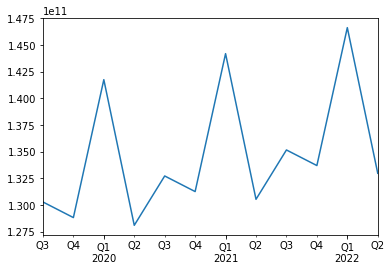

In [20]:
fcst_series.plot.line()

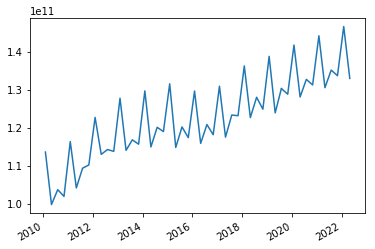

In [21]:
full_series=pd.concat([stmts.revenue,fcst_series])
full_series.plot.line()

In [22]:
full_series=pd.DataFrame(full_series)

In [23]:
full_series.rename(columns={0:'Revenue'},inplace = True)
full_series

,Revenue
2010-01-31,1.136220e+11
2010-04-30,9.981100e+10
2010-07-31,1.037260e+11
2010-10-31,1.019520e+11
2011-01-31,1.163600e+11
2011-04-30,1.041890e+11
2011-07-31,1.093660e+11
2011-10-31,1.102260e+11
2012-01-31,1.227280e+11
2012-04-30,1.130100e+11


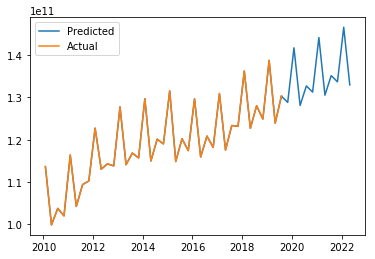

In [24]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(np.array(full_series.index),full_series.Revenue.values,label='Predicted')
plt.plot(np.array(reg_df.index),reg_df.Revenue.values,label='Actual')
plt.legend()
plt.show()